In [1]:
import fiftyone as fo
import fiftyone.zoo as foz

import fiftyone.utils.huggingface as fouh

dataset = fouh.load_from_hub(
    "Voxel51/Total-Text-Dataset",
    max_samples=200,
    overwrite=True
    )

Loading dataset
Importing samples...
 100% |█████████████████| 200/200 [12.4ms elapsed, 0s remaining, 16.1K samples/s]      
Migrating dataset 'Voxel51/Total-Text-Dataset' to v1.7.0


In [2]:
dataset.first()

<Sample: {
    'id': '663286a94cdfbb5155325294',
    'media_type': 'image',
    'filepath': '/home/harpreet/fiftyone/huggingface/hub/Voxel51/Total-Text-Dataset/data/data_0/img826.jpg',
    'tags': ['Train'],
    'metadata': None,
    'created_at': datetime.datetime(2024, 5, 1, 18, 15, 5),
    'last_modified_at': datetime.datetime(2025, 7, 3, 22, 9, 40, 293000),
    'ground_truth_polylines': <Polylines: {
        'polylines': [
            <Polyline: {
                'id': '6632868b4cdfbb515531ec15',
                'attributes': {},
                'tags': [],
                'label': 'ALL',
                'points': [
                    [
                        [0.42, 0.82],
                        [0.45, 0.82],
                        [0.47, 0.82],
                        [0.47, 0.85],
                        [0.45, 0.85],
                        [0.42, 0.85],
                    ],
                ],
                'confidence': None,
                'index': None,
             

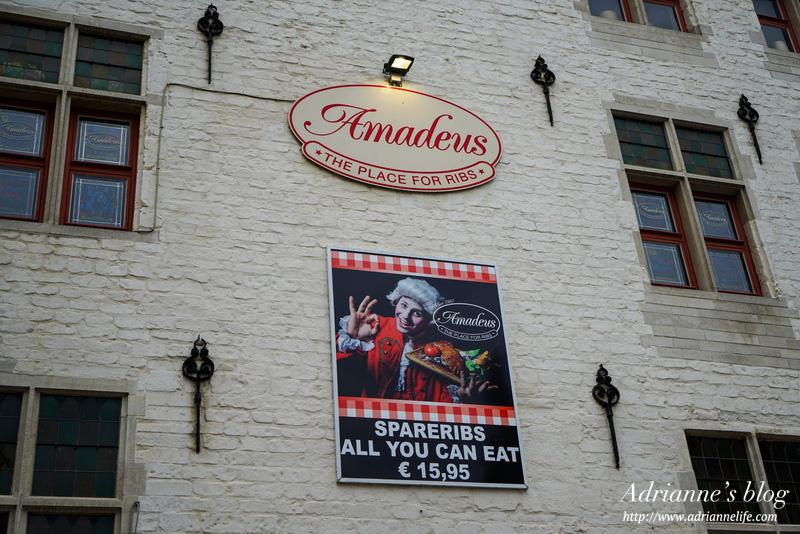

In [3]:
from PIL import Image
Image.open(dataset.first().filepath)

In [ ]:
import fiftyone.zoo as foz

# Register the model source
foz.register_zoo_model_source(
    "https://github.com/harpreetsahota204/Nemotron_Nano_VL", 
    )

In [ ]:
import fiftyone.zoo as foz

model = foz.load_zoo_model(
    "nvidia/Llama-3.1-Nemotron-Nano-VL-8B-V1",
    # install_requirements=True, #you can pass this to make sure you have all reqs installed
    )

# "Read the text" OCR

In [6]:
model.operation = "vqa"
model.prompt = "Read all the text in this image, in reading order that is left to right, top to bottom"
dataset.apply_model(model, label_field="text_ocr")

 100% |█████████████████| 200/200 [4.5m elapsed, 0s remaining, 1.1 samples/s]      


In [7]:
print(dataset.first()['text_ocr'])

Amadeus
THE PLACE FOR RIBS
SPARERIBS
ALL YOU CAN EAT
€ 15,95
Adrianne's blog
http://www.adrianneLife.com


# Grounded OCR

The below example will show how to perform grounded OCR

In [8]:
model.operation = "detect"

model.prompt = "Detect all the text in ths image"

dataset.apply_model(
    model, 
    label_field="detect_ocr"
    )

 100% |█████████████████| 200/200 [18.8m elapsed, 0s remaining, 0.2 samples/s]    


In [9]:
dataset.first()['detect_ocr']

<Detections: {
    'detections': [
        <Detection: {
            'id': '686701b9a7f5187a89d0bc33',
            'attributes': {},
            'tags': [],
            'label': 'Amadeus',
            'bounding_box': [0.38, 0.176, 0.23399999999999999, 0.123],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'reasoning': 'The name of the establishment.',
        }>,
        <Detection: {
            'id': '686701b9a7f5187a89d0bc34',
            'attributes': {},
            'tags': [],
            'label': 'The Place for Ribs',
            'bounding_box': [0.4, 0.272, 0.205, 0.03599999999999998],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'reasoning': "The tagline under the establishment's name.",
        }>,
        <Detection: {
            'id': '686701b9a7f5187a89d0bc35',
            'attributes': {},
            'tags': 

# Spatial OCR

In [10]:
model.operation = "detect"

model.prompt = "Detect the top most text in this image"

dataset.apply_model(
    model, 
    label_field="top_text"
    )

 100% |█████████████████| 200/200 [8.6m elapsed, 0s remaining, 0.3 samples/s]    


In [11]:
dataset.first()['top_text']

<Detections: {
    'detections': [
        <Detection: {
            'id': '6867061ca7f5187a89d0bef5',
            'attributes': {},
            'tags': [],
            'label': 'Amadeus',
            'bounding_box': [0.38, 0.176, 0.23399999999999999, 0.123],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'reasoning': 'The topmost text is the name of the establishment, which is prominently displayed in a red oval sign.',
        }>,
    ],
}>

# Classification

In [12]:
model.operation = "classify"

model.prompt = """Classify the surface that the largest text in this image on. Choose ONE:
- Signage
- Product packaging
- Clothing/apparel
- Digital screen
- Print media
- Vehicle
- Building/wall
- Menu
- Receipt/ticket
- Billboard
- Road marking
- ID document

"""

dataset.apply_model(
    model, 
    label_field="nemo_classes"
    )

 100% |█████████████████| 200/200 [6.7m elapsed, 0s remaining, 0.5 samples/s]    


In [13]:
dataset.first()['nemo_classes']

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '68670871a7f5187a89d0bfee',
            'tags': [],
            'label': 'Building/wall',
            'confidence': None,
            'logits': None,
            'reasoning': "The largest text 'Amadeus' is on a sign that is mounted on a building's wall.",
        }>,
    ],
    'logits': None,
}>

Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port



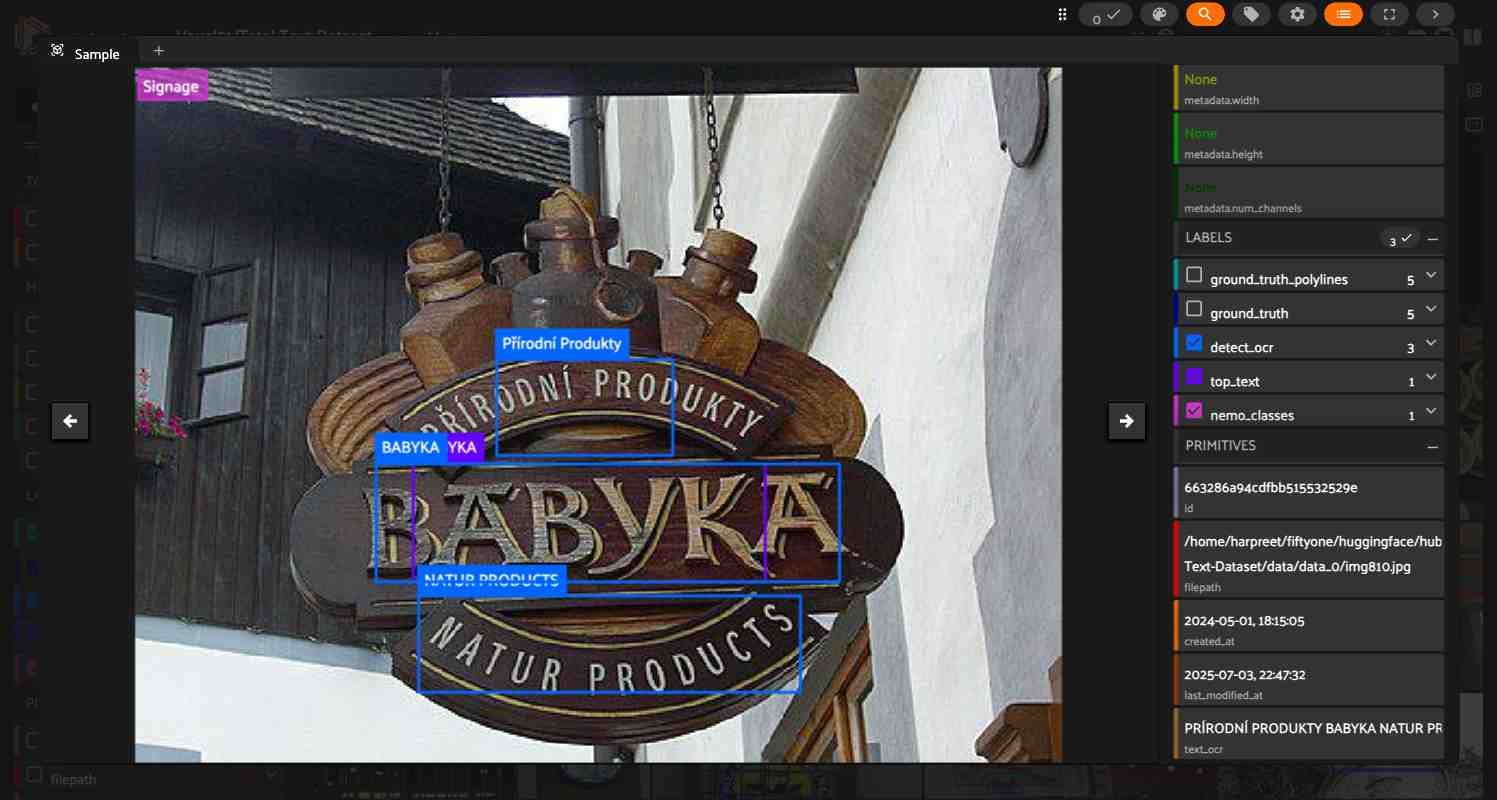

In [14]:
session = fo.launch_app(dataset)

In [15]:
session.freeze()